## Mean / Median imputation - pandas

This example is based on the examples posted on GitHub for [Feature Engineering for Machine Learning Course](https://github.com/solegalli/feature-engineering-for-machine-learning)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# We'll use the following features,
# 3 of which contain NA.

cols_to_use = [
    "OverallQual",  # Rates the overall material and finish of the house
    "TotalBsmtSF",  # Total square feet of basement area
    "1stFlrSF",     # First floor square feet
    "GrLivArea",    # Above grade (ground) living area square feet
    "WoodDeckSF",   # Wood deck area in square feet
    "BsmtUnfSF",    # Unfinished square feet of basement area
    "LotFrontage",  # Linear feet of street connected to property
    "MasVnrArea",   # Masonry veneer area in square feet
    "GarageYrBlt",  # Year garage was built
    "SalePrice",    # Sale price
]


- Get the dataset from [House Sale Price Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [ ]:
# Let's load the House Prices dataset.
fileUrl = 'https://raw.githubusercontent.com/cmps460s26/cmps460-content/refs/heads/main/examples/03.dp/datasets/houseprice.csv'
df = pd.read_csv(fileUrl, usecols=cols_to_use)

print(df.shape)
df.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [29]:
# Missing data stats
df.isnull().sum()

,0
LotFrontage,259
OverallQual,0
MasVnrArea,8
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,81
WoodDeckSF,0
SalePrice,0


In [30]:
# Capture the variables to impute in a list
vars_to_impute = [col for col in df.columns if df[col].isnull().sum() > 0]
vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

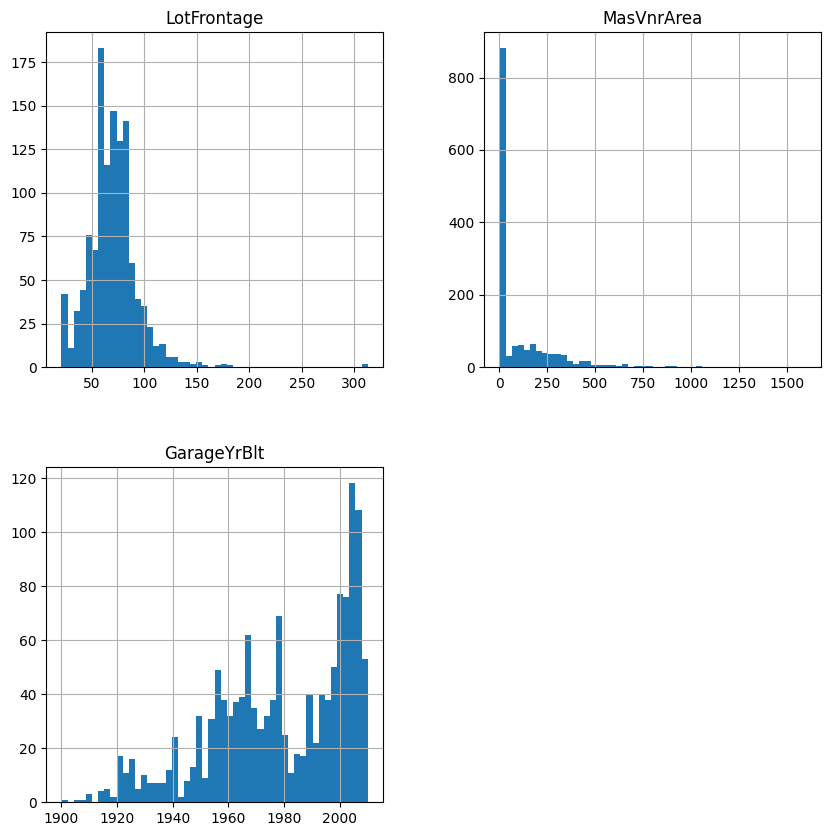

In [31]:
# Let's plot the distributions of the variables to impute
df[vars_to_impute].hist(bins=50, figsize=(10, 10))
plt.show()

### Original Distributions
- **LotFrontage**: Shows a roughly normal distribution but with some right skew.
- **MasVnrArea**: Heavily skewed with a massive peak at 0, indicating most properties lack masonry veneer.
- **GarageYrBlt**: Left-skewed, indicating more garages were built in recent years.


In [32]:
# Capture the median of the 3 variables in a dictionary
imputation_dict = df[vars_to_impute].median().to_dict()
imputation_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1980.0}

### Imputation Values
We have calculated the median for each variable:
- **LotFrontage**: 69.0 feet.
- **MasVnrArea**: 0.0 sq ft (reinforcing the prevalence of 0 values).
- **GarageYrBlt**: 1980.
These values will be used to fill the missing entries.


To perform mean imputation instead of median, we just replace the previous code by: `imputation_dict = df[vars_to_impute].mean().to_dict()`


In [33]:
# Replace missing data
df.fillna(imputation_dict, inplace=True)

In [36]:
# Ensure imputation was done
df.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0
SalePrice,0


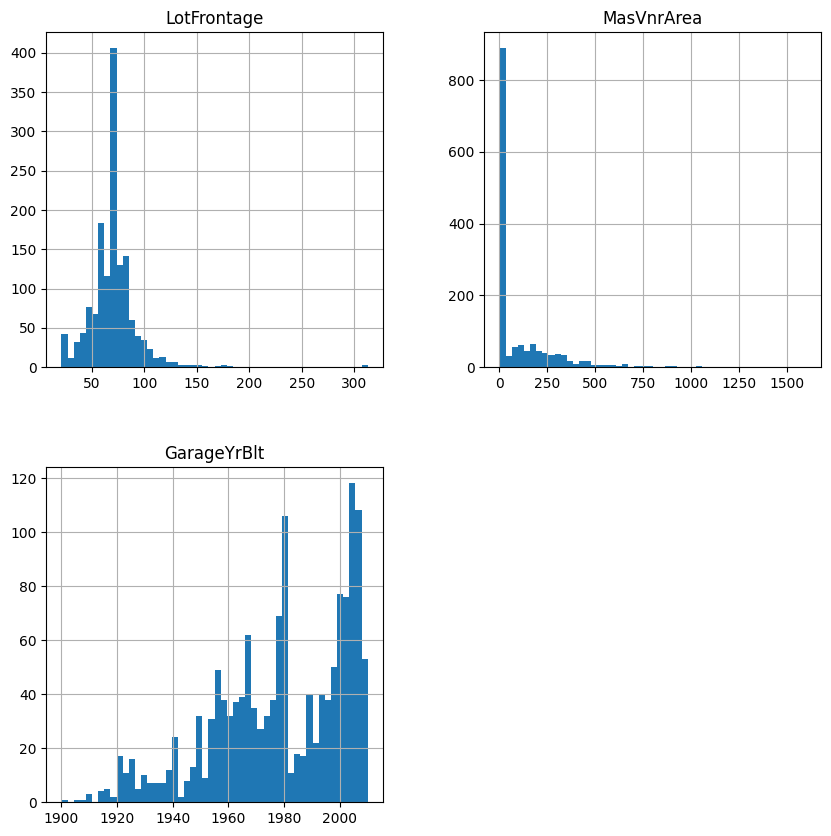

In [35]:
# Let's plot the distributions of the variables after imputation
df[vars_to_impute].hist(bins=50, figsize=(10, 10))
plt.show()

### Imputation Results
Comparing the histograms before and after imputation, we can observe the following effects:

1.  **Distortion of Distribution**: There is a noticeable change in the shape of the distributions.
    -   **LotFrontage**: We see a tall "spike" around the median value (69.0). The natural spread of the data is interrupted by this artificial peak.
    -   **MasVnrArea**: The peak at 0 has become even more pronounced. Since the median was 0, this imputation reinforces the existing mode but doesn't introduce a new peak.
    -   **GarageYrBlt**: A significant artificial peak has appeared at 1980, distorting the original age distribution of garages.

2.  **Variance Underestimation**: By filling missing values with a constant (the median), we are effectively reducing the variance of these variables. This makes the data appear more centered around the average than it actually is.

**Conclusion:** While Mean/Median imputation is easy to implement, it can significantly distort the data distribution and correlations, especially when the percentage of missing data is high.
